In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load the dataset
df = pd.read_csv("Dataset .csv")

# Drop rows with missing target or essential features
df = df.dropna(subset=['Aggregate rating', 'Cuisines'])

# Select features and target
features = [
    'Average Cost for two', 'Price range', 'Votes',
    'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'City', 'Currency'
]
target = 'Aggregate rating'

# Create a new dataframe with only the required columns
data = df[features + [target]].copy()

# Encode binary columns: Yes/No to 1/0
binary_map = {'Yes': 1, 'No': 0}
for col in ['Has Table booking', 'Has Online delivery', 'Is delivering now']:
    data[col] = data[col].map(binary_map)

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in ['City', 'Currency']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders in case you want to inverse later

# Split into input and target
X = data[features]
y = data[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using appropriate metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:\n  Mean Squared Error: {mse:.4f}\n  R² Score: {r2:.4f}\n")


Linear Regression Results:
Mean Squared Error: 1.6026
R² Score: 0.3002
Model Evaluation Metrics:
Mean Squared Error (MSE): 1.6026
R² Score: 0.3002
Linear Regression:
  Mean Squared Error: 1.6026
  R² Score: 0.3002

Decision Tree:
  Mean Squared Error: 0.2127
  R² Score: 0.9071

Random Forest:
  Mean Squared Error: 0.1161
  R² Score: 0.9493



In [11]:
import pandas as pd


# Drop rows with missing values in required columns
df = df.dropna(subset=["Cuisines", "Aggregate rating", "Votes"])

# Use only the first cuisine listed for simplicity
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Group by Primary Cuisine to calculate total votes, average rating, and count
cuisine_stats = df.groupby('Primary Cuisine').agg({
    'Votes': 'sum',
    'Aggregate rating': ['mean', 'count']
}).reset_index()

# Rename columns
cuisine_stats.columns = ['Cuisine', 'Total Votes', 'Average Rating', 'Restaurant Count']

# Filter to cuisines with at least 30 restaurants
filtered_stats = cuisine_stats[cuisine_stats['Restaurant Count'] >= 30]

# Top-rated cuisines
top_rated = filtered_stats.sort_values('Average Rating', ascending=False).head(10)

# Lowest-rated cuisines
bottom_rated = filtered_stats.sort_values('Average Rating').head(10)

# Most popular cuisines by votes
most_popular = filtered_stats.sort_values('Total Votes', ascending=False).head(10)

# Print summaries
print("\n Top 10 Highest Rated Cuisines (min 30 restaurants):\n")
print(top_rated[['Cuisine', 'Average Rating', 'Restaurant Count']].to_string(index=False))

print("\n Bottom 10 Lowest Rated Cuisines (min 30 restaurants):\n")
print(bottom_rated[['Cuisine', 'Average Rating', 'Restaurant Count']].to_string(index=False))

print("\n Top 10 Most Popular Cuisines (by Total Votes):\n")
print(most_popular[['Cuisine', 'Total Votes', 'Average Rating']].to_string(index=False))

# Optional: Correlation between popularity and rating
correlation = filtered_stats['Total Votes'].corr(filtered_stats['Average Rating'])
print(f"\n Correlation between Total Votes and Average Rating: {correlation:.2f}")



 Top 10 Highest Rated Cuisines (min 30 restaurants):

    Cuisine  Average Rating  Restaurant Count
     Indian        4.096078                51
    Seafood        3.973469                49
   European        3.887097                62
   Japanese        3.769444                72
    Mexican        3.730645                62
      Asian        3.676623                77
Continental        3.606809               235
   American        3.555755               278
    Italian        3.453846               234
     Burger        3.425000               116

 Bottom 10 Lowest Rated Cuisines (min 30 restaurants):

     Cuisine  Average Rating  Restaurant Count
      Mithai        1.834553               246
     Mughlai        1.992093               215
     Biryani        2.085714               112
   Raw Meats        2.149091               110
 Street Food        2.269915               236
     Chinese        2.325731               855
      Bakery        2.332206               621
   Fas

<ipython-input-13-0ef4a54a3d7b>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_text_counts.index, y=rating_text_counts.values, palette="viridis", ax=axes[1])


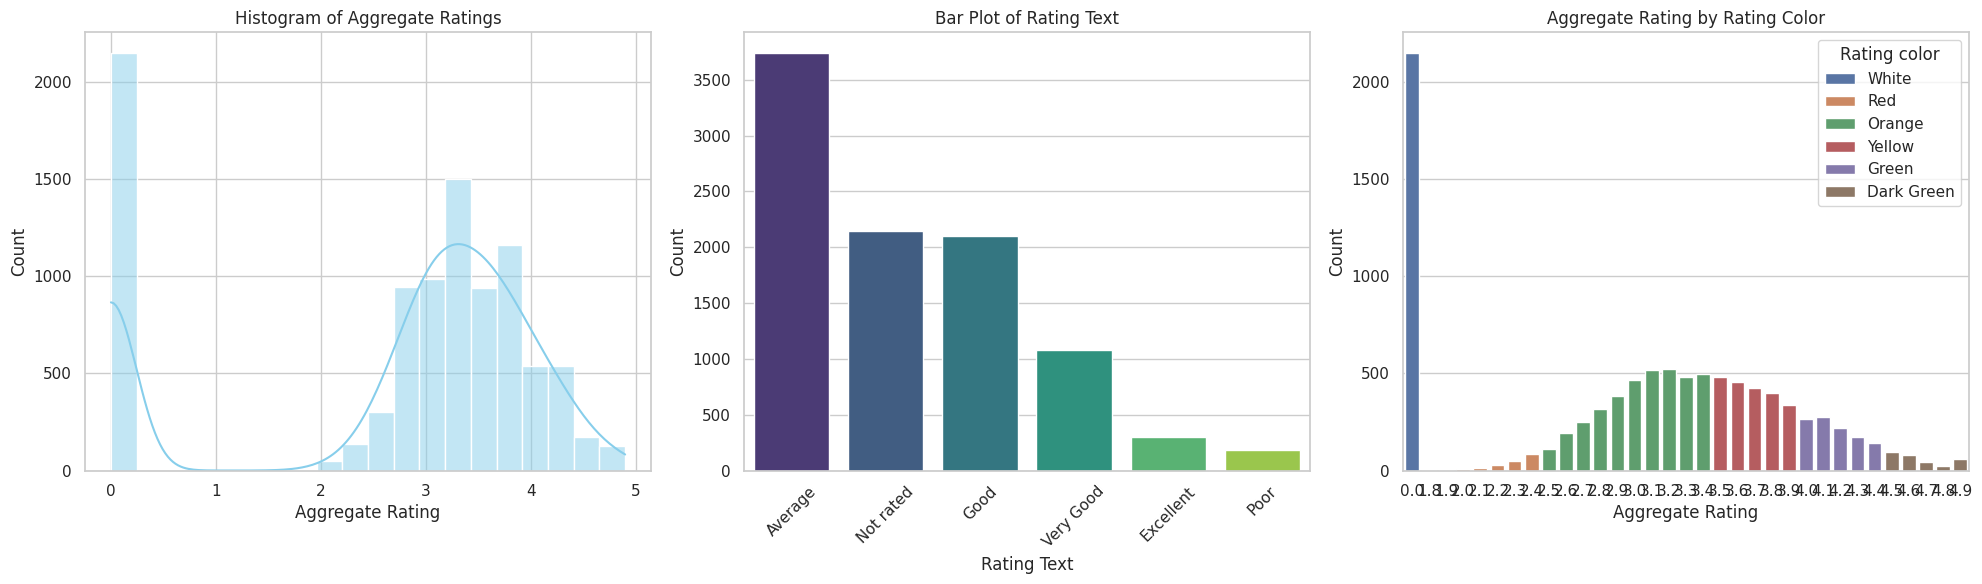

<ipython-input-13-0ef4a54a3d7b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, ax=axes[0], palette="coolwarm")
<ipython-input-13-0ef4a54a3d7b>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, ax=axes[1], palette="mako")


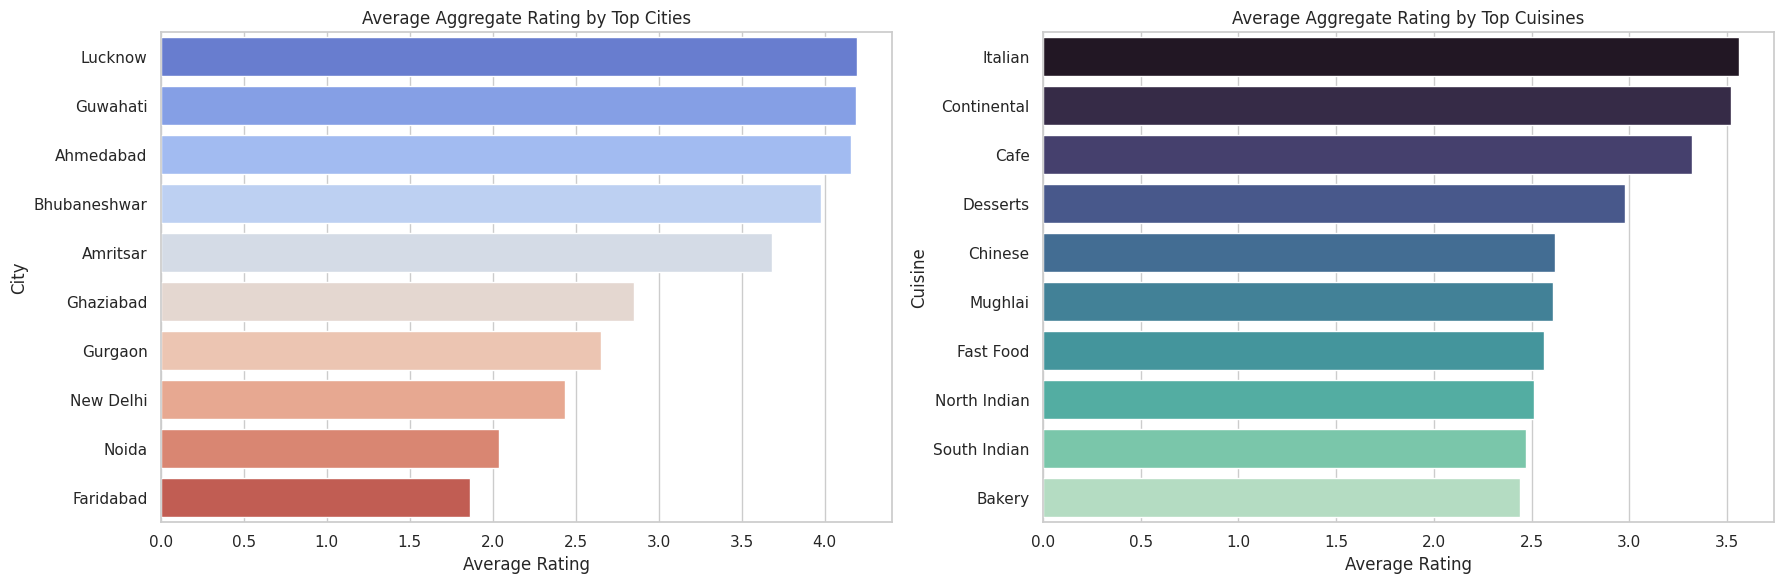

<ipython-input-13-0ef4a54a3d7b>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price range", y="Aggregate rating", data=df, palette="Set3", ax=axes[0, 0])
<ipython-input-13-0ef4a54a3d7b>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Has Online delivery", y="Aggregate rating", data=df, palette="cool", ax=axes[0, 1])
<ipython-input-13-0ef4a54a3d7b>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Has Table booking", y="Aggregate rating", data=df, palette="pastel", ax=axes[1, 0])


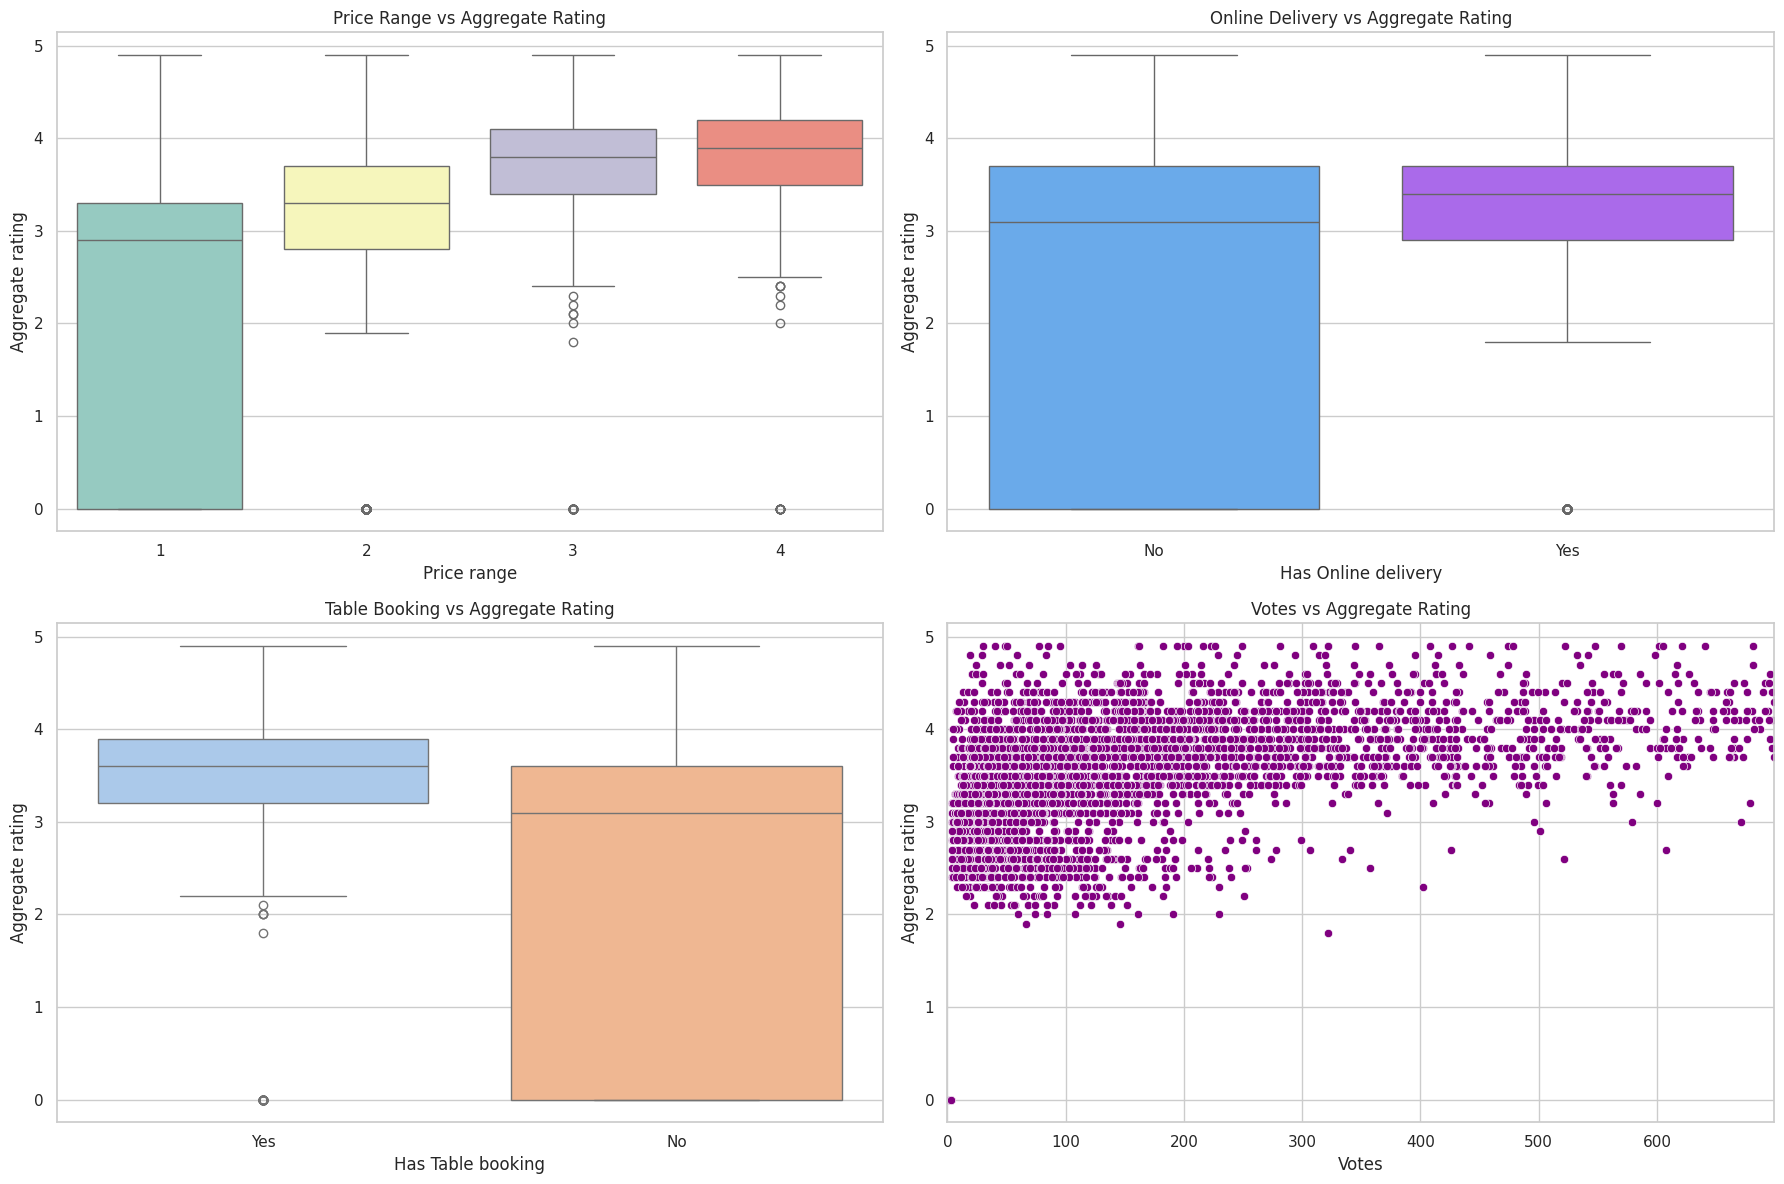

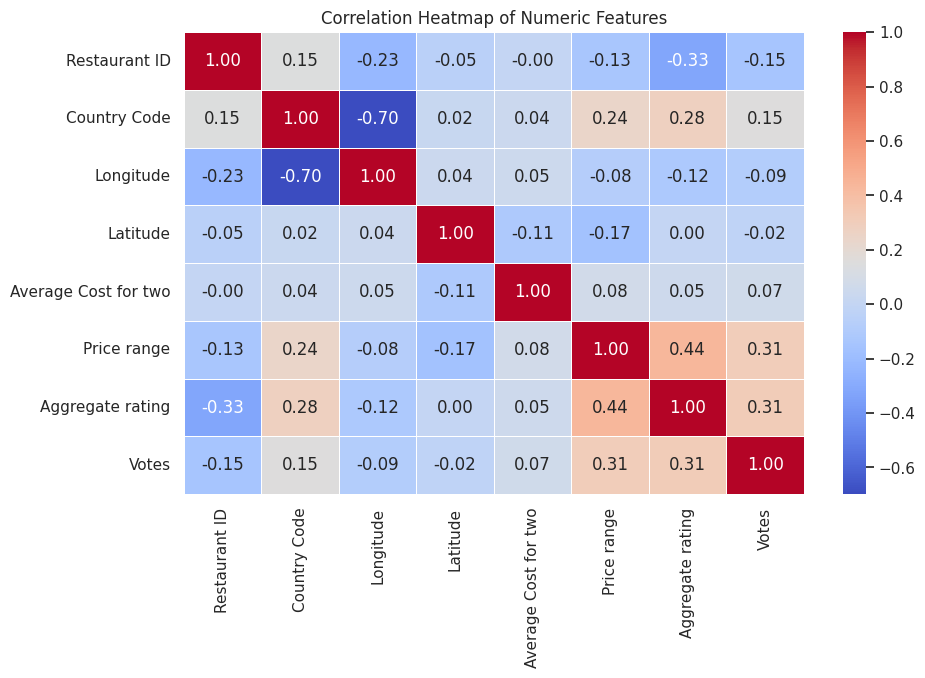

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Set seaborn style
sns.set(style="whitegrid")


# Part 1: Distribution of Ratings

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histogram of Aggregate Ratings
sns.histplot(df["Aggregate rating"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram of Aggregate Ratings")
axes[0].set_xlabel("Aggregate Rating")
axes[0].set_ylabel("Count")

# Bar Plot of Rating Text
rating_text_counts = df["Rating text"].value_counts()
sns.barplot(x=rating_text_counts.index, y=rating_text_counts.values, palette="viridis", ax=axes[1])
axes[1].set_title("Bar Plot of Rating Text")
axes[1].set_xlabel("Rating Text")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

# Bar Plot of Aggregate Rating by Rating Color
rating_color_grouped = df.groupby(["Aggregate rating", "Rating color"]).size().reset_index(name='Counts')
sns.barplot(data=rating_color_grouped, x="Aggregate rating", y="Counts", hue="Rating color", ax=axes[2])
axes[2].set_title("Aggregate Rating by Rating Color")
axes[2].set_xlabel("Aggregate Rating")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


# Part 2: Average Rating by Top Cities

top_cities = df['City'].value_counts().nlargest(10).index
avg_rating_city = (
    df[df['City'].isin(top_cities)]
    .groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)


# Part 3: Average Rating by Top Cuisines

df_cuisine_split = df.dropna(subset=['Cuisines']).copy()
df_cuisine_split['Cuisines'] = df_cuisine_split['Cuisines'].str.split(', ')
df_cuisine_split = df_cuisine_split.explode('Cuisines')

top_cuisines = df_cuisine_split['Cuisines'].value_counts().nlargest(10).index
avg_rating_cuisine = (
    df_cuisine_split[df_cuisine_split['Cuisines'].isin(top_cuisines)]
    .groupby('Cuisines')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)


# Part 4: Plot Avg Rating by City & Cuisine

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, ax=axes[0], palette="coolwarm")
axes[0].set_title("Average Aggregate Rating by Top Cities")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("City")

sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, ax=axes[1], palette="mako")
axes[1].set_title("Average Aggregate Rating by Top Cuisines")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("Cuisine")

plt.tight_layout()
plt.show()


# Part 5: Feature Relationships with Ratings

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Price Range vs Aggregate Rating
sns.boxplot(x="Price range", y="Aggregate rating", data=df, palette="Set3", ax=axes[0, 0])
axes[0, 0].set_title("Price Range vs Aggregate Rating")

# Online Delivery vs Aggregate Rating
sns.boxplot(x="Has Online delivery", y="Aggregate rating", data=df, palette="cool", ax=axes[0, 1])
axes[0, 1].set_title("Online Delivery vs Aggregate Rating")

# Table Booking vs Aggregate Rating
sns.boxplot(x="Has Table booking", y="Aggregate rating", data=df, palette="pastel", ax=axes[1, 0])
axes[1, 0].set_title("Table Booking vs Aggregate Rating")

# Votes vs Aggregate Rating
sns.scatterplot(x="Votes", y="Aggregate rating", data=df, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Votes vs Aggregate Rating")
axes[1, 1].set_xlim(0, df["Votes"].quantile(0.95))  # Remove outliers

plt.tight_layout()
plt.show()


# Part 6: Correlation Heatmap

numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()
